### GROUP 3 Final Report

##### Qi Gui
##### Yichen Li
##### Junzhe Yin
##### Jiatian Ye

### PART2. Exploratory Data Analysis 

#### Environment Preparation

In [2]:
# Start SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("group3_project").getOrCreate()

In [3]:
# Start Spark Context
from pyspark import SparkContext, SparkConf
sc = spark.sparkContext

In [4]:
spark

In [5]:
sc

<SparkContext master=yarn appName=group3_project>

In [6]:
from pyspark.sql.functions import isnull, when, count, col
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mydf = spark.read.parquet('s3://bigdata-group3/mergedata/hardrive.parquet/*.parquet')

In [8]:
drop_columns=[
    'smart_2_normalized',
    'smart_2_raw',
    'smart_8_normalized',
    'smart_8_raw',
    'smart_11_normalized',
    'smart_11_raw',
    'smart_13_normalized',
    'smart_13_raw',
    'smart_15_normalized',
    'smart_15_raw',
    'smart_22_normalized',
    'smart_22_raw',
    'smart_177_normalized',
    'smart_177_raw',
    'smart_179_normalized',
    'smart_179_raw',
    'smart_181_normalized',
    'smart_181_raw',
    'smart_182_normalized',
    'smart_182_raw',
    'smart_183_normalized',
    'smart_183_raw',
    'smart_184_normalized',
    'smart_184_raw',
    'smart_189_normalized',
    'smart_189_raw',
    'smart_191_normalized',
    'smart_191_raw',
    'smart_195_normalized',
    'smart_195_raw',
    'smart_196_normalized',
    'smart_196_raw',
    'smart_200_normalized',
    'smart_200_raw',
    'smart_201_normalized',
    'smart_201_raw',
    'smart_220_normalized',
    'smart_220_raw',
    'smart_222_normalized',
    'smart_222_raw',
    'smart_223_normalized',
    'smart_223_raw',
    'smart_224_normalized',
    'smart_224_raw',
    'smart_225_normalized',
    'smart_225_raw',
    'smart_226_normalized',
    'smart_226_raw',
    'smart_235_normalized',
    'smart_235_raw',
    'smart_250_normalized',
    'smart_250_raw',
    'smart_251_normalized',
    'smart_251_raw',
    'smart_252_normalized',
    'smart_252_raw',
    'smart_254_normalized',
    'smart_254_raw',   
    'smart_255_normalized',
    'smart_255_raw'
]
mydf_new=mydf.drop(*drop_columns)

In [8]:
mydf_new.columns

['date',
 'serial_number',
 'model',
 'capacity_bytes',
 'failure',
 'smart_1_normalized',
 'smart_1_raw',
 'smart_3_normalized',
 'smart_3_raw',
 'smart_4_normalized',
 'smart_4_raw',
 'smart_5_normalized',
 'smart_5_raw',
 'smart_7_normalized',
 'smart_7_raw',
 'smart_9_normalized',
 'smart_9_raw',
 'smart_10_normalized',
 'smart_10_raw',
 'smart_12_normalized',
 'smart_12_raw',
 'smart_187_normalized',
 'smart_187_raw',
 'smart_188_normalized',
 'smart_188_raw',
 'smart_190_normalized',
 'smart_190_raw',
 'smart_192_normalized',
 'smart_192_raw',
 'smart_193_normalized',
 'smart_193_raw',
 'smart_194_normalized',
 'smart_194_raw',
 'smart_197_normalized',
 'smart_197_raw',
 'smart_198_normalized',
 'smart_198_raw',
 'smart_199_normalized',
 'smart_199_raw',
 'smart_240_normalized',
 'smart_240_raw',
 'smart_241_normalized',
 'smart_241_raw',
 'smart_242_normalized',
 'smart_242_raw']

### Exploratory Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, to_date
import seaborn as sns

In [10]:
mydf_new.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- serial_number: string (nullable = true)
 |-- model: string (nullable = true)
 |-- capacity_bytes: long (nullable = true)
 |-- failure: integer (nullable = true)
 |-- smart_1_normalized: double (nullable = true)
 |-- smart_1_raw: double (nullable = true)
 |-- smart_3_normalized: double (nullable = true)
 |-- smart_3_raw: double (nullable = true)
 |-- smart_4_normalized: double (nullable = true)
 |-- smart_4_raw: double (nullable = true)
 |-- smart_5_normalized: double (nullable = true)
 |-- smart_5_raw: double (nullable = true)
 |-- smart_7_normalized: double (nullable = true)
 |-- smart_7_raw: double (nullable = true)
 |-- smart_9_normalized: double (nullable = true)
 |-- smart_9_raw: double (nullable = true)
 |-- smart_10_normalized: double (nullable = true)
 |-- smart_10_raw: double (nullable = true)
 |-- smart_12_normalized: double (nullable = true)
 |-- smart_12_raw: double (nullable = true)
 |-- smart_187_normalized: double (nullabl

In [11]:
mydf_new.createOrReplaceTempView("table")

#### 1.Descriptive Analysis

First we want to count the total number of failed drives and good drives

In [13]:
# The total number of non-failure in our data.
spark.sql(
"""
SELECT COUNT(*)
FROM table
where failure=1
""").show()

+--------+
|count(1)|
+--------+
|    3591|
+--------+



In [22]:
# The total number of good drives in our data.
spark.sql(
"""
SELECT COUNT(*) 
FROM table
WHERE failure = 0
""").show()

+--------+
|count(1)|
+--------+
|76711269|
+--------+



So based on above, we found we have 3951 failed drives and 76,711,269 good drives.

Then we summarize the capacity_bytes of drives group by failure.

In [21]:
# summarize capacity_bytes
spark.sql("""
SELECT failure,max(capacity_bytes),min(capacity_bytes),avg(capacity_bytes)
FROM table
GROUP BY failure
""").cache().show()

+-------+-------------------+-------------------+--------------------+
|failure|max(capacity_bytes)|min(capacity_bytes)| avg(capacity_bytes)|
+-------+-------------------+-------------------+--------------------+
|      1|     14000519643136|                 -1|7.731943432105169E12|
|      0|     16000900661248|                 -1|7.554520998855706E12|
+-------+-------------------+-------------------+--------------------+



From above tables, we can see the max drive's capacity is far larger thn the avarage. 
However, the max,min and avarage value of capacity have not much difference among failed and good drive.

Then we look at the S.M.A.R.T values of drive, different smart value indicate different features of the drives.

In [17]:
# looking at the avarage of numeric value 
spark.sql(
"""
SELECT failure, ROUND(AVG(capacity_bytes),0) AS avg_bytes,ROUND(AVG(smart_1_raw),2) AS avg_smart1, ROUND(AVG(smart_3_raw),2) AS avg_smart3,
ROUND(AVG(smart_5_raw),2) AS avg_smart5,ROUND(AVG(smart_7_raw),2) AS avg_smart7,ROUND(AVG(smart_9_raw),2) AS avg_smart9, ROUND(AVG(smart_10_raw),2) AS avg_smart10,
ROUND(AVG(smart_12_raw),2) AS avg_smart12
FROM table
GROUP BY failure
""").show()

+-------+-----------------+--------------+----------+----------+-----------------+----------+-----------+-----------+
|failure|        avg_bytes|    avg_smart1|avg_smart3|avg_smart5|       avg_smart7|avg_smart9|avg_smart10|avg_smart12|
+-------+-----------------+--------------+----------+----------+-----------------+----------+-----------+-----------+
|      1|7.731943432105E12|1.0619022824E8|     222.0|    2509.6|8.095124012294E10|  17605.48|     312.08|       7.59|
|      0|7.554520998856E12| 9.142359948E7|    188.49|       8.8|   2.2399268658E9|   17291.6|      23.14|       6.29|
+-------+-----------------+--------------+----------+----------+-----------------+----------+-----------+-----------+



In [18]:
# looking at the avarage of numeric value 
spark.sql(
"""
SELECT failure, ROUND(AVG(smart_187_raw),2) AS avg_smart187, ROUND(AVG(smart_188_raw),2) AS avg_smart188,
ROUND(AVG(smart_190_raw),2) AS avg_smart190,ROUND(AVG(smart_192_raw),2) AS avg_smart192,ROUND(AVG(smart_193_raw),2) AS avg_smart193, ROUND(AVG(smart_194_raw),2) AS avg_smart194,
ROUND(AVG(smart_197_raw),2) AS avg_smart197,ROUND(AVG(smart_198_raw),2) AS avg_smart198,ROUND(AVG(smart_199_raw),2) AS avg_smart199
FROM table
GROUP BY failure
""").show()

+-------+------------+---------------+------------+------------+------------+------------+------------+------------+------------+
|failure|avg_smart187|   avg_smart188|avg_smart190|avg_smart192|avg_smart193|avg_smart194|avg_smart197|avg_smart198|avg_smart199|
+-------+------------+---------------+------------+------------+------------+------------+------------+------------+------------+
|      1|      147.65|1.22334291782E9|       28.42|      129.45|    17781.28|       28.57|       154.3|      150.64|        1.04|
|      0|        0.29| 1.1788572663E8|       28.55|      175.18|     14766.3|       28.55|         0.1|        0.09|        0.91|
+-------+------------+---------------+------------+------------+------------+------------+------------+------------+------------+



In [19]:
# looking at the avarage of numeric value 
spark.sql(
"""
SELECT failure, ROUND(AVG(smart_240_raw),2) AS avg_smart240, ROUND(AVG(smart_241_raw),2) AS avg_smart241,
ROUND(AVG(smart_242_raw),2) AS avg_smart242
FROM table
GROUP BY failure
""").show()

+-------+-------------------+-----------------+------------------+
|failure|       avg_smart240|     avg_smart241|      avg_smart242|
+-------+-------------------+-----------------+------------------+
|      1|1.15904219668358E12|4.560440042654E10|1.2831397514791E11|
|      0|1.61980043741236E12|4.335124156654E10|1.0290301694496E11|
+-------+-------------------+-----------------+------------------+



##### Foundings:

Looking at the avarage value of the numeric variables group by the failure, we found smart5,smart187,samrt188,smart197,smart198 are significant different among failed and good drives.

1. smart5 represents the reallocated_sector_count,which indicates the count of reallocated sectors (512 bytes) whenever the hard drive finds a read/write/verification error.So failure hard drive have much higher reallocated_sector count.
2. smart187 represents the Reported_Uncorrectable_Errors,drives with failure=0 have nearly 0 Reported_Uncorrectable_Errors.
3. smart188 is command timeout,failure disk has larger timeout.
4. smart197 is current_pending,indicates the current count of unstable sectors,failure drive has higher current count of unstable sectors. 
5. smart198 is offline Uncorrectable which indicated the drive marks it as bad, so failure disk has more number marks.

Then we want to look specifically at these five columns.

#### 2. Visualization Analysis of Specific S.M.A.R.T Columns


Create a column to derive the date from the 'date' column.

In [8]:
mydf_new = mydf_new.withColumn('date_only', to_date(col('date')))

In [9]:
#create year,quarter columns and combined them as quarter2. 
from pyspark.sql.functions import quarter,year
mydf_new = mydf_new.withColumn('year',year(mydf_new.date_only))
mydf_new = mydf_new.withColumn('quarter',quarter(mydf_new.date_only))
mydf_new = mydf_new.withColumn('quarter2',concat(col('year'),lit(" "),col('quarter')))

##### 2.1 The distribution of avarage smart_187_raw by quarter

In [10]:
mydf_new.createOrReplaceTempView('table2')

In [11]:
#The avarage smart_187_raw distribution by quarter
sql1 = spark.sql(
"""
SELECT ROUND(avg(smart_187_raw),2) as avg_smart187, quarter2
FROM table2
Group by quarter2
Order by quarter2
"""
)

In [14]:
sql1.show()

+------------+--------+
|avg_smart187|quarter2|
+------------+--------+
|        0.06|  2018 1|
|        0.06|  2018 2|
|        0.08|  2018 3|
|        0.07|  2018 4|
|        0.07|  2019 1|
|        0.12|  2019 2|
|        0.74|  2019 3|
|        1.11|  2019 4|
+------------+--------+



In [15]:
df1=sql1.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


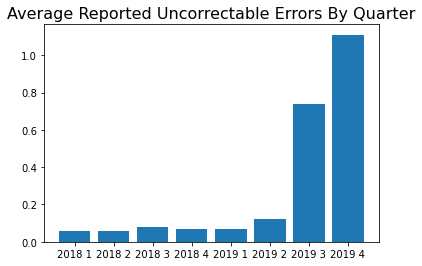

In [22]:
# Bar plot of samrt187 by quarter 
plt.bar(df1['quarter2'], df1['avg_smart187'])
plt.title('Average Reported Uncorrectable Errors By Quarter', fontsize=16)
plt.show()

The average Reported Uncorrectable Errors increases by quarter from 2018-2019.

##### 2.2 The distribution of avarage smart_5_raw by quarter

In [11]:
#The avarage smart_5_raw distribution by quarter
sql2 = spark.sql(
"""
SELECT ROUND(avg(smart_5_raw),2) as avg_smart5, quarter2
FROM table2
Group by quarter2
Order by quarter2
"""
)

In [13]:
df2=sql2.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


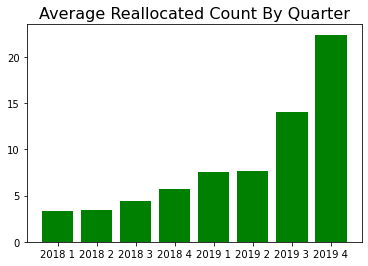

In [14]:
# Plot bar plot of samrt187 by quarter 
plt.bar(df2['quarter2'], df2['avg_smart5'],color='green')
plt.title('Average Reallocated Count By Quarter', fontsize=16)
plt.show()

The average reallocated count also increase as Quarter increase.

##### 2.3 The distribution of avarage smart_188_raw by quarter

In [11]:
#The avarage smart_5_raw distribution by quarter
sql3 = spark.sql(
"""
SELECT ROUND(avg(smart_188_raw),-7) as avg_smart188, quarter2
FROM table2
Group by quarter2
Order by quarter2
"""
)

In [12]:
df3=sql3.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


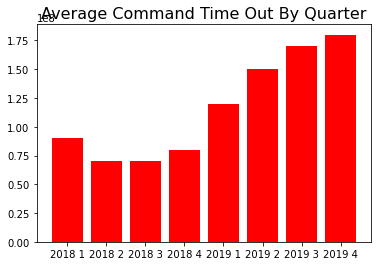

In [13]:
# Plot bar plot of samrt187 by quarter 
plt.bar(df3['quarter2'], df3['avg_smart188'],color='red')
plt.title('Average Command Time Out By Quarter', fontsize=16)
plt.show()

Also the average command timeout increases quarterly from 2018 to 2019, however, it increases at a lower rate campring SMART5 and SMART187.

##### 2.4 The distribution of avarage smart_197_raw by quarter

In [13]:
#The avarage smart_5_raw distribution by quarter
sql4 = spark.sql(
"""
SELECT ROUND(avg(smart_197_raw),2) as avg_smart197, quarter2
FROM table2
Group by quarter2
Order by quarter2
"""
)

In [15]:
df4 = sql4.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


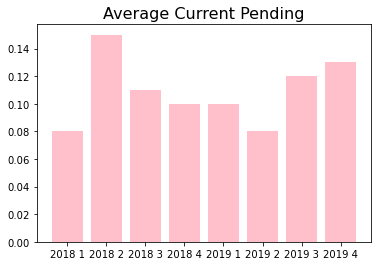

In [17]:
# Plot bar plot of samrt187 by quarter 
plt.bar(df4['quarter2'], df4['avg_smart197'],color='pink')
plt.title('Average Current Pending By Quarter', fontsize=16)
plt.show()

The average current count of unstable sectors have maximum value at 2018 Q2, and decreases until 2019Q2. It goes up from 2019Q2.

##### 2.4 The distribution of avarage smart_198_raw by quarter

In [11]:
#The avarage smart_5_raw distribution by quarter
sql5 = spark.sql(
"""
SELECT ROUND(avg(smart_198_raw),2) as avg_smart198, quarter2
FROM table2
Group by quarter2
Order by quarter2
"""
)

In [12]:
df5 = sql5.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


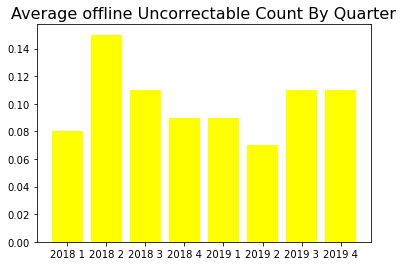

In [18]:
# Plot bar plot of samrt187 by quarter 
plt.bar(df5['quarter2'], df5['avg_smart198'],color='yellow')
plt.title('Average offline Uncorrectable Count By Quarter', fontsize=16)
plt.show()

The average offline uncorrectable count by quarter has similar distribution as smart197, however, it does't increase too much from 2019Q3 to 2019Q4.

#### 3. Hard drives' lifetime Analysis 

* Next, we want to find out the lifetime of failure hard drive, in other words, calculating the length of time a hard drive is used. 
* Why we interested in this is because both customers and merchants wants to know the lifetime of a hard drive. On the one hand, for customers, they will know the minimum usage time of a hard drive, on the other hand, merchant could use lifetime as an indicator to check their product and re-enact the relevant insurance policies for commodities. 

##### 3.1 Select the failure part into a new dataframe

In [9]:
hdd_fail = mydf_new[mydf_new['failure'] == 1]
hdd_fail.head()

Row(date=datetime.datetime(2019, 2, 28, 0, 0), serial_number='S301NH5Z', model='ST4000DM000', capacity_bytes=4000787030016, failure=1, smart_1_normalized=116.0, smart_1_raw=116052776.0, smart_3_normalized=92.0, smart_3_raw=0.0, smart_4_normalized=100.0, smart_4_raw=8.0, smart_5_normalized=98.0, smart_5_raw=2088.0, smart_7_normalized=90.0, smart_7_raw=366929.0, smart_9_normalized=68.0, smart_9_raw=28400.0, smart_10_normalized=100.0, smart_10_raw=0.0, smart_12_normalized=100.0, smart_12_raw=7.0, smart_187_normalized=93.0, smart_187_raw=7.0, smart_188_normalized=100.0, smart_188_raw=0.0, smart_190_normalized=77.0, smart_190_raw=23.0, smart_192_normalized=100.0, smart_192_raw=0.0, smart_193_normalized=33.0, smart_193_raw=134620.0, smart_194_normalized=23.0, smart_194_raw=23.0, smart_197_normalized=100.0, smart_197_raw=0.0, smart_198_normalized=100.0, smart_198_raw=0.0, smart_199_normalized=200.0, smart_199_raw=0.0, smart_240_normalized=100.0, smart_240_raw=27603.0, smart_241_normalized=100

In [10]:
hdd_fail.count()

3591

In [11]:
#Change the data to toPandas() in order for visualization part
hdd_fail1 = hdd_fail.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead
  warnings.warn(msg, FutureWarning)


In [12]:
#Checkout the features and non-nulls
hdd_fail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3591 non-null   datetime64[ns]
 1   serial_number         3591 non-null   object        
 2   model                 3591 non-null   object        
 3   capacity_bytes        3591 non-null   int64         
 4   failure               3591 non-null   int32         
 5   smart_1_normalized    3571 non-null   float64       
 6   smart_1_raw           3571 non-null   float64       
 7   smart_3_normalized    3570 non-null   float64       
 8   smart_3_raw           3570 non-null   float64       
 9   smart_4_normalized    3570 non-null   float64       
 10  smart_4_raw           3570 non-null   float64       
 11  smart_5_normalized    3580 non-null   float64       
 12  smart_5_raw           3580 non-null   float64       
 13  smart_7_normalized

##### 3.2 Build the lifetime model

In [16]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Find the lifetime of failed hard drives
lifetimes = []
for index,row in hdd_fail1.iterrows():
    start_date = hdd_fail1.iloc[0]['date']
    #print(start_date)
    end_date = row['date']
    #print(end_date)

    time_difference = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    lifetimes.append(time_difference.days)
    
hdd_fail1['lifetime'] = lifetimes  
hdd_fail1.head(10)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,lifetime
0,2019-02-28,S301NH5Z,ST4000DM000,4000787030016,1,116.0,116052776.0,92.0,0.0,100.0,...,0.0,200.0,0.0,100.0,27603.0,100.0,2.855573e+10,100.0,1.372069e+11,0
1,2019-02-28,ZCH0DYK0,ST12000NM0007,12000138625024,1,82.0,168484080.0,91.0,0.0,100.0,...,0.0,200.0,0.0,100.0,6898.0,100.0,3.684632e+10,100.0,5.536328e+10,0
2,2019-02-28,ZCH0AXMF,ST12000NM0007,12000138625024,1,80.0,93240536.0,94.0,0.0,100.0,...,0.0,200.0,0.0,100.0,9552.0,100.0,5.001290e+10,100.0,8.338128e+10,0
3,2019-02-28,ZCH03YFN,ST12000NM0007,12000138625024,1,83.0,182583552.0,91.0,0.0,100.0,...,0.0,200.0,0.0,100.0,9855.0,100.0,5.296665e+10,100.0,1.081047e+11,0
4,2019-03-01,ZCH0547F,ST12000NM0007,12000138625024,1,79.0,73253752.0,92.0,0.0,100.0,...,0.0,200.0,0.0,100.0,11427.0,100.0,5.643299e+10,100.0,1.052615e+11,1
5,2019-03-01,57QEWPXQT,TOSHIBA MQ01ABF050,500107862016,1,100.0,0.0,100.0,1997.0,100.0,...,0.0,200.0,0.0,100.0,0.0,NaN,NaN,NaN,NaN,1
6,2019-03-01,ZJV1L5N1,ST12000NM0007,12000138625024,1,78.0,68119032.0,91.0,0.0,100.0,...,0.0,200.0,0.0,100.0,2896.0,100.0,2.845420e+10,100.0,2.849878e+10,1
7,2019-03-01,ZA153SZQ,ST8000NM0055,8001563222016,1,78.0,59978584.0,84.0,0.0,100.0,...,0.0,200.0,0.0,100.0,14941.0,100.0,4.709905e+10,100.0,1.018428e+11,1
8,2019-03-01,ZA13GZB3,ST8000NM0055,8001563222016,1,70.0,20637384.0,98.0,0.0,100.0,...,0.0,200.0,0.0,100.0,15274.0,100.0,4.877498e+10,100.0,1.111616e+11,1
9,2019-03-02,S2ZYJ9GGB01043,ST500LM012 HN,500107862016,1,100.0,4530.0,95.0,1814.0,100.0,...,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2


In [22]:
#Fliter failed hard drives that have lifetime larger than 0
Fhdd_fail = hdd_fail1[hdd_fail1['lifetime'] > 0]

##### 3.3 Lifetime Visualization

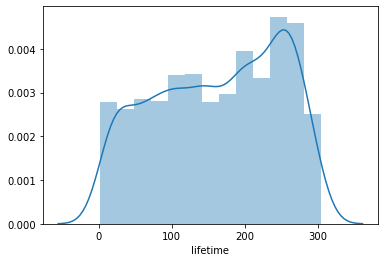

In [19]:
#Distribution of the lifetime
sns.distplot(Fhdd_fail['lifetime']); 

From the plot, we can see the distribution of lifetime among failed drives is highly left skewed, the lifetime are centered between 200-300.

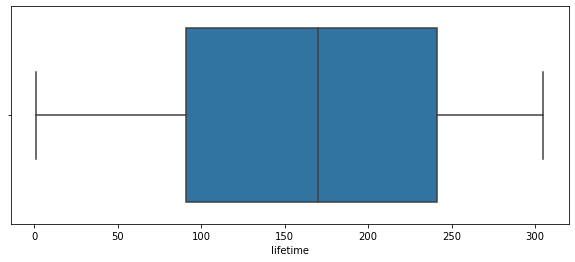

In [20]:
#Box Plot of the lifetime
plt.figure(figsize=(10,4))
sns.boxplot(x=Fhdd_fail['lifetime'])

From the plot, we can clearly see that the life span of failure hard drive is 0-300 days, and the median is around 170.

In [28]:
spark.stop()